In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy


In [ ]:
def scalar_mult(u, v):
  sum = 0
  for i in range(0, len(u)):
    sum += u[i]*v[i]
  return sum

In [ ]:
def gold_ratio(f, b, calculationsF, a = 0, e = 1e-7):
    t = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / t
    Xk2 = Ak + (Bk - Ak) / t
    y1, y2 = f(Xk1), f(Xk2)
    calculationsF += 2
    while lk >= e:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
        lk = Bk - Ak
        calculationsF += 1
    return (Ak + Bk) / 2, calculationsF

In [ ]:
#6 * x ** 2 + 3 * y ** 2 − 4*x*y + 4 * np.sqrt(5) * (x + 2y) + 22

=== Метод сопряженных градиентов ===
eps =  0.001
x* =  -2.236068003412091 -4.472135951887813
f(x*) =  -28.00000000000002
iterations =  2
calculationsF =  76
calculationsDF =  4


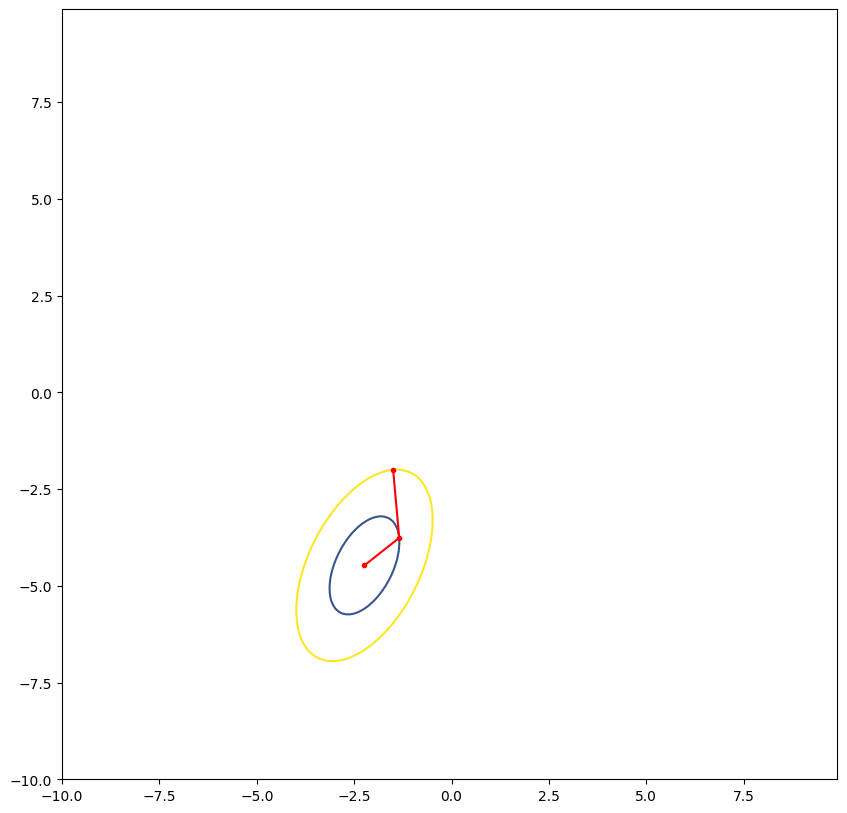

In [ ]:
F = lambda x, y: 6 * x ** 2 + 3 * y ** 2 - 4*x*y + 4 * np.sqrt(5) * (x + 2*y) + 22
#F=lambda x, y: 6 * x ** 2 + 3 * y ** 2
#F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
f = lambda X: F(X[0], X[1])
w = lambda X: -np.array(grad_F(X[0], X[1]))

alpha = 1
kappa = 1
X = np.array([-1.5, -2])
eps = 1e-3

iterations = 0
calculationsF = 0
calculationsDF = 0

# градиент
x_, y_ = sympy.Symbol('x'), sympy.Symbol('y')
grad_F = sympy.tensor.array.derive_by_array(F(x_, y_), (x_, y_))
grad_F = sympy.lambdify((x_, y_), grad_F, 'numpy')

data = [f(X)]
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

p = w(X)

#Метод сопряженных градиентов
while (np.linalg.norm(w(X)) > eps):
  phi = lambda kappa_: f(X + kappa_ * p)
  kappa, calculationsF = gold_ratio(phi, 2.5, calculationsF)
  wk = w(X)
  X = X + kappa * p
  wk1 = w(X)
  gamma = scalar_mult(wk1, wk1) / scalar_mult(p, wk)
  p = gamma * p + wk1
  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.append(f(X))
  iterations += 1
  calculationsDF += 2
#штуки для визуализации
x_space = np.arange(-10, 10, 0.1)
y_space = np.arange(-10, 10, 0.1)
xgrid, ygrid = np.meshgrid(x_space, y_space)
#z = (xgrid**2-ygrid)**2+(xgrid-1)**2
z=6 * xgrid** 2 + 3 * ygrid**2 - 4*xgrid*ygrid + 4 * np.sqrt(5) * (xgrid + 2*ygrid) + 22
#z=6 * xgrid** 2 + 3 * ygrid**2

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, sorted(data))
plt.plot(X_line, Y_line, color = "r", marker = ".")

print("=== Метод сопряженных градиентов ===")
print("eps = ", eps)
print("x* = ", X[0], X[1])
print("f(x*) = ", F(X[0], X[1]))
print("iterations = ", iterations)
print("calculationsF = ", calculationsF)
print("calculationsDF = ", calculationsDF)
plt.show()

=== Метод Флетчера-Ривса ===
eps =  1e-05
x* =  -2.236068003412091 -4.472135951887813
f(x*) =  -28.00000000000002
iterations =  2
calculationsF =  76
calculationsDF =  8


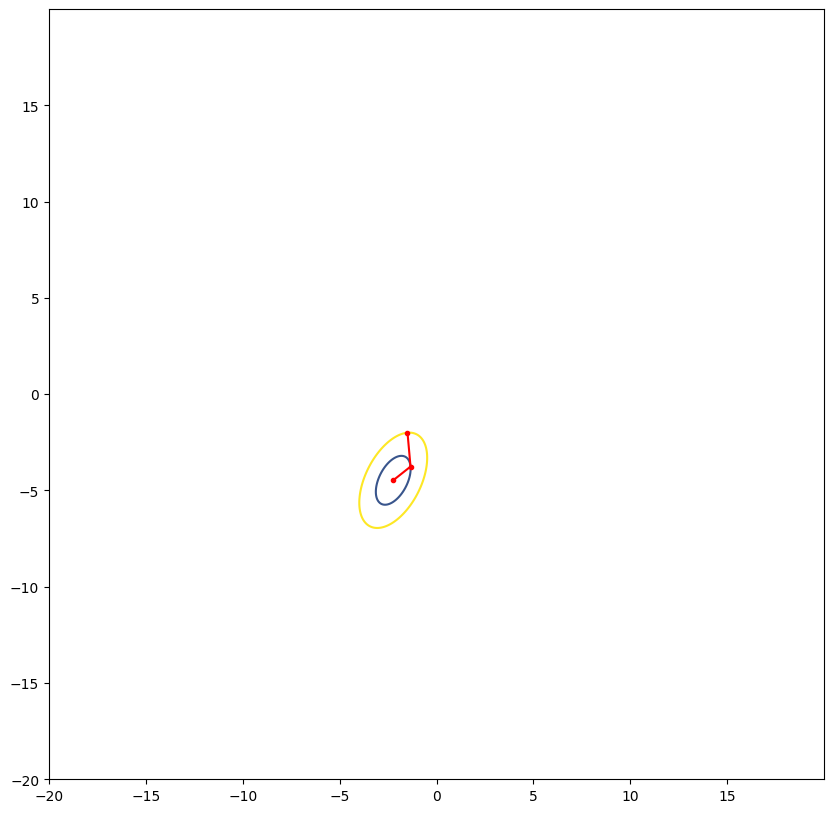

In [ ]:
F = lambda x, y: 6 * x ** 2 + 3 * y ** 2 - 4*x*y + 4 * np.sqrt(5) * (x + 2*y) + 22
#F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
f = lambda X: F(X[0], X[1])
w = lambda X: -np.array(grad_F(X[0], X[1]))

alpha = 1
kappa = 1
X = np.array([-1.5, -2])
eps = 1e-5

iterations = 0
calculationsF = 0
calculationsDF = 0

# градиент
x_, y_ = sympy.Symbol('x'), sympy.Symbol('y')
grad_F = sympy.tensor.array.derive_by_array(F(x_, y_), (x_, y_))
grad_F = sympy.lambdify((x_, y_), grad_F, 'numpy')

data = [f(X)]
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

p = w(X)
#Метод Флетчера-Ривса
while (np.linalg.norm(w(X)) > eps):
  phi = lambda kappa_: f(X + kappa_ * p)
  kappa, calculationsF = gold_ratio(phi, 2.5, calculationsF)
  wk = w(X)
  X = X + kappa * p
  wk1 = w(X)
  gamma = scalar_mult(wk1, wk1) / scalar_mult(wk, wk)
  p = gamma * p + wk1
  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.append(f(X))
  iterations += 1
  calculationsDF += 4

#штуки для визуализации
x_space = np.arange(-20, 20, 0.01)
y_space = np.arange(-20, 20, 0.01)
xgrid, ygrid = np.meshgrid(x_space, y_space)
#z = (xgrid**2-ygrid)**2+(xgrid-1)**2
z=6 * xgrid** 2 + 3 * ygrid**2 - 4*xgrid*ygrid + 4 * np.sqrt(5) * (xgrid + 2*ygrid) + 22
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, sorted(data))
plt.plot(X_line, Y_line, color = "r", marker = ".")

print("=== Метод Флетчера-Ривса ===")
print("eps = ", eps)
print("x* = ", X[0], X[1])
print("f(x*) = ", F(X[0], X[1]))
print("iterations = ", iterations)
print("calculationsF = ", calculationsF)
print("calculationsDF = ", calculationsDF)
plt.show()

=== Метод Полака-Рибьера ===
eps =  1e-05
x* =  -2.236068076995478 -4.4721361539909505
f(x*) =  -27.999999999999922
iterations =  1
calculationsF =  38
calculationsDF =  4


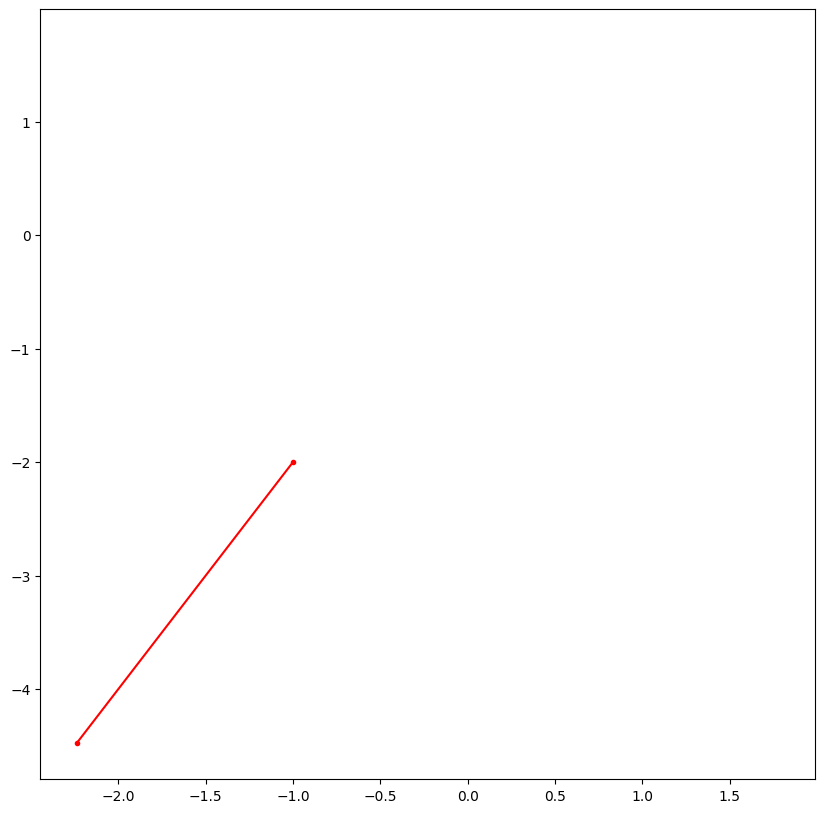

In [ ]:
F = lambda x, y: 6 * x ** 2 + 3 * y ** 2 - 4*x*y + 4 * np.sqrt(5) * (x + 2*y) + 22
#F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
f = lambda X: F(X[0], X[1])
w = lambda X: -np.array(grad_F(X[0], X[1]))

alpha = 200
kappa = 1
X = np.array([-1, -2])
eps = 1e-5

iterations = 0
calculationsF = 0
calculationsDF = 0

# градиент
x_, y_ = sympy.Symbol('x'), sympy.Symbol('y')
grad_F = sympy.tensor.array.derive_by_array(F(x_, y_), (x_, y_))
grad_F = sympy.lambdify((x_, y_), grad_F, 'numpy')

data = [f(X)]
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

p = w(X)
#Метод Полака-Рибьера
while (np.linalg.norm(w(X)) > eps):
  phi = lambda kappa_: f(X + kappa_ * p)
  kappa, calculationsF = gold_ratio(phi, 2.5, calculationsF)
  wk = w(X)
  X = X + kappa * p
  wk1 = w(X)
  gamma = scalar_mult(wk1-wk, wk1) / scalar_mult(wk, wk)
  p = gamma * p + wk1
  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.append(f(X))
  iterations += 1
  calculationsDF += 4

#штуки для визуализации
x_space = np.arange(-2, 2, 0.01)
y_space = np.arange(-2, 2, 0.01)
xgrid, ygrid = np.meshgrid(x_space, y_space)
z = (xgrid**2-ygrid)**2+(xgrid-1)**2

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, sorted(data))
plt.plot(X_line, Y_line, color = "r", marker = ".")

print("=== Метод Полака-Рибьера ===")
print("eps = ", eps)
print("x* = ", X[0], X[1])
print("f(x*) = ", F(X[0], X[1]))
print("iterations = ", iterations)
print("calculationsF = ", calculationsF)
print("calculationsDF = ", calculationsDF)
plt.show()

[[22  4]
 [ 4  2]]
[[ 9.65182007 -1.51422312]
 [-1.51422312  2.        ]]
[[ 2.7865081  -0.44422763]
 [-0.44422763  2.        ]]
[[10.90290361 -4.33830873]
 [-4.33830873  2.        ]]
[[11.78142289 -4.4566496 ]
 [-4.4566496   2.        ]]
[[10.23943486 -4.06881796]
 [-4.06881796  2.        ]]
[[10.28146892 -4.07362069]
 [-4.07362069  2.        ]]
[[10.0016517  -4.00020392]
 [-4.00020392  2.        ]]
=== Метод с матрицей Гессе ===
eps =  0.001
x* =  1.0000066946557666 1.0000147983328058
f(x*) =  4.680363048218749e-11
iterations =  8
calculationsF =  304
calculationsDF =  96


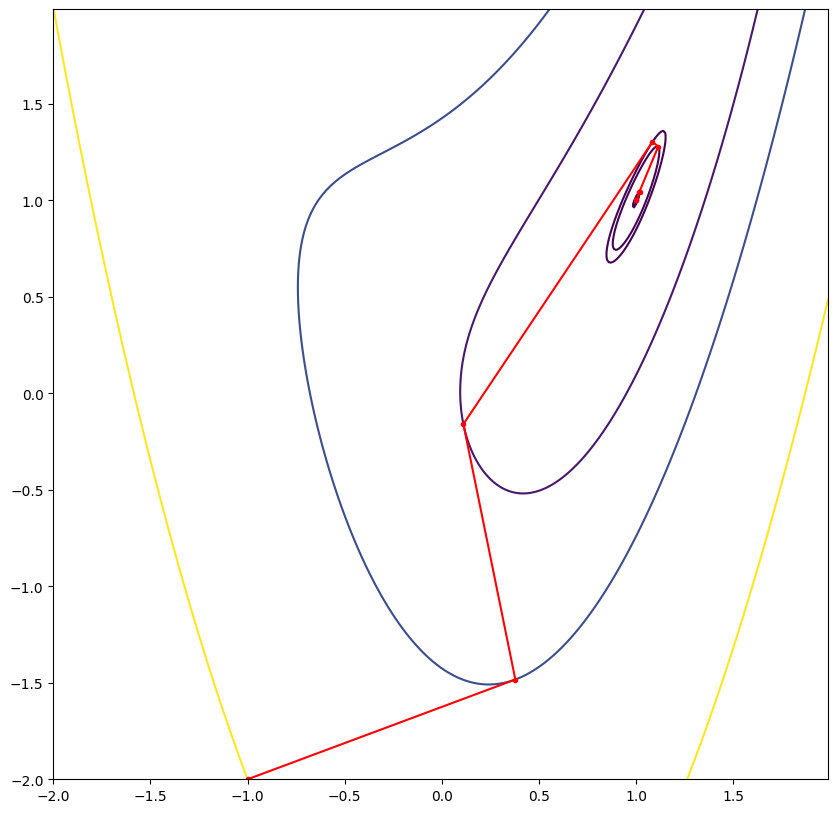

In [ ]:
alpha = 1
#F = lambda x, y: 6 * x ** 2 + 3 * y ** 2 - 4*x*y + 4 * np.sqrt(5) * (x + 2*y) + 22
F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
f = lambda X: F(X[0], X[1])
w = lambda X: -np.array(grad_F(X[0], X[1]))

kappa = 1
X = np.array([-1, -2])
eps = 1e-3

iterations = 0
calculationsF = 0
calculationsDF = 0

# градиент
x_, y_ = sympy.Symbol('x'), sympy.Symbol('y')
grad_F = sympy.tensor.array.derive_by_array(F(x_, y_), (x_, y_))
grad_F = sympy.lambdify((x_, y_), grad_F, 'numpy')


def Hesse(x, y):
  H_11 = sympy.diff(sympy.diff(F(x_, y_), x_), x_)
  H_11 = sympy.lambdify((x_, y_), H_11, 'numpy')
  H_12 = sympy.diff(sympy.diff(F(x_, y_), x_), y_)
  H_12 = sympy.lambdify((x_, y_), H_12, 'numpy')
  H_21 = sympy.diff(sympy.diff(F(x_, y_), y_), x_)
  H_21 = sympy.lambdify((x_, y_), H_21, 'numpy')
  H_22 = sympy.diff(sympy.diff(F(x_, y_), y_), y_)
  H_22 = sympy.lambdify((x_, y_), H_22, 'numpy')

  h_11 = lambda X: H_11(X[0], X[1])
  h_12 = lambda X: H_12(X[0], X[1])
  h_21 = lambda X: H_21(X[0], X[1])
  h_22 = lambda X: H_22(X[0], X[1])

  H = np.array([[h_11(X), h_12(X)],[h_21(X), h_22(X)]])
  return H

data = [f(X)]
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

p = w(X)

#Метод с матрицей Гессе
while (np.linalg.norm(w(X)) > eps):
  phi = lambda kappa_: f(X + kappa_ * p)
  kappa, calculationsF = gold_ratio(phi, 2.5, calculationsF)
  wk = w(X)
  H = Hesse(X[0], X[1])
  print(H)
  X = X + kappa * p
  wk1 = w(X)
  gamma = -((scalar_mult(H.dot(p), wk1)) / (scalar_mult(H.dot(p), p)))
  p = gamma * p + wk1
  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.append(f(X))
  iterations += 1
  calculationsDF += 12


#штуки для визуализации
x_space = np.arange(-2, 2, 0.01)
y_space = np.arange(-2, 2, 0.01)
xgrid, ygrid = np.meshgrid(x_space, y_space)
z = ((xgrid**2-ygrid)**2)+(xgrid-1)**2

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, sorted(data))
plt.plot(X_line, Y_line, color = "r", marker = ".")

print("=== Метод с матрицей Гессе ===")
print("eps = ", eps)
print("x* = ", X[0], X[1])
print("f(x*) = ", F(X[0], X[1]))
print("iterations = ", iterations)
print("calculationsF = ", calculationsF)
print("calculationsDF = ", calculationsDF)
plt.show()



